importing Jupyter notebook from networks/evdcae_net.ipynb
importing Jupyter notebook from networks/print_n_plot.ipynb
importing Jupyter notebook from networks/build_evdcae.ipynb
importing Jupyter notebook from networks/train_val.ipynb
importing Jupyter notebook from helper/helper_fxns.ipynb
Building model and compiling functions...
(None, 2, 8, 24)
(None, 128, 11, 12)
(None, 128, 6, 6)
(None, 1024)
(None, 4608)
(None, 128, 6, 6)
(None, 128, 11, 12)
(None, 2, 8, 24)
Starting training...
Epoch 1 of 11 took 0.332s
	training los:		0.1963
	training acc:		17.7875 %
  validation loss:		0.211667
  validation accuracy:		21.17 %


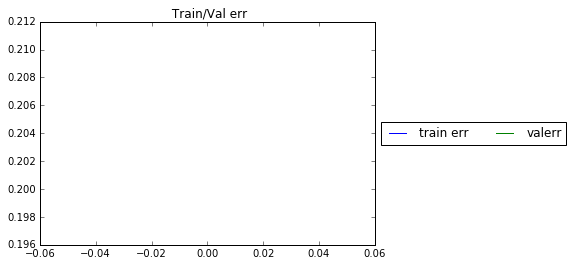

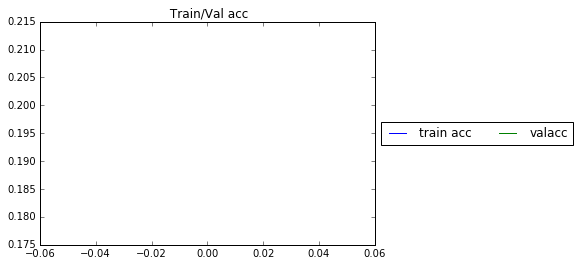

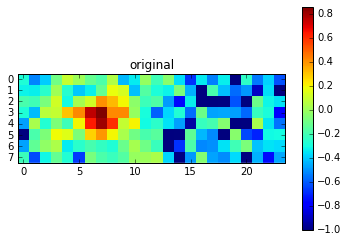

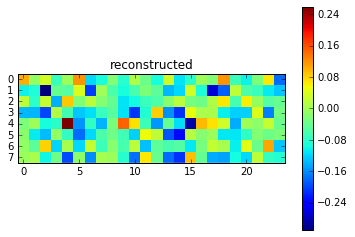

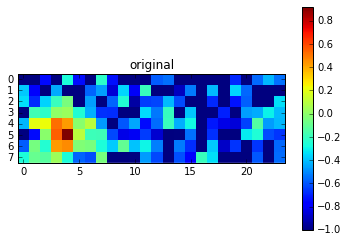

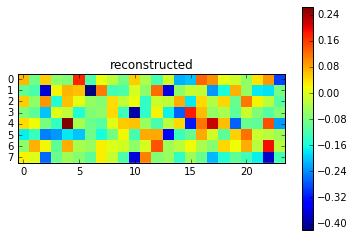

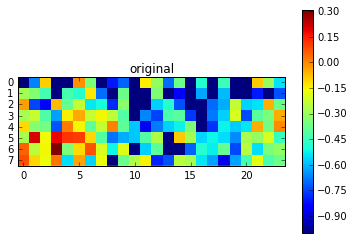

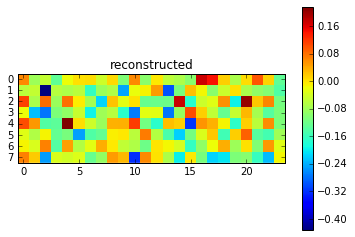

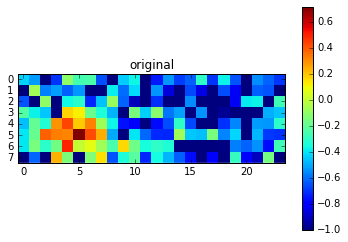

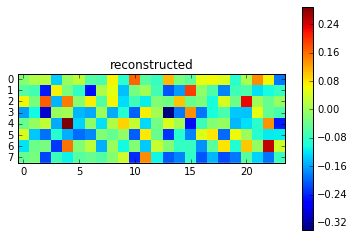

Epoch 2 of 11 took 0.299s
	training los:		0.1778
	training acc:		15.5416 %
  validation loss:		0.189004
  validation accuracy:		18.90 %
Epoch 3 of 11 took 0.296s
	training los:		0.1554
	training acc:		13.3318 %
  validation loss:		0.165757
  validation accuracy:		16.58 %
Epoch 4 of 11 took 0.271s
	training los:		0.1333
	training acc:		11.5083 %
  validation loss:		0.146021
  validation accuracy:		14.60 %
Epoch 5 of 11 took 0.246s
	training los:		0.1147
	training acc:		10.2300 %
  validation loss:		0.133950
  validation accuracy:		13.40 %
Epoch 6 of 11 took 0.226s
	training los:		0.1022
	training acc:		9.6943 %
  validation loss:		0.127016
  validation accuracy:		12.70 %
Epoch 7 of 11 took 0.226s
	training los:		0.0967
	training acc:		9.7106 %
  validation loss:		0.126594
  validation accuracy:		12.66 %
Epoch 8 of 11 took 0.232s
	training los:		0.0974
	training acc:		10.0444 %
  validation loss:		0.129285
  validation accuracy:		12.93 %
Epoch 9 of 11 took 0.255s
	training los:		0.1002
	

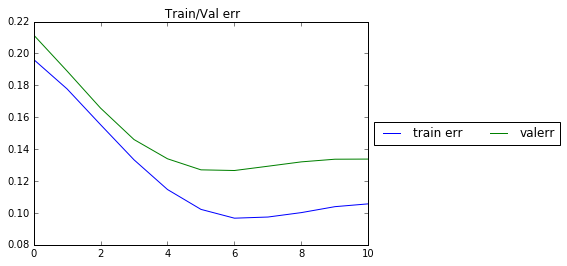

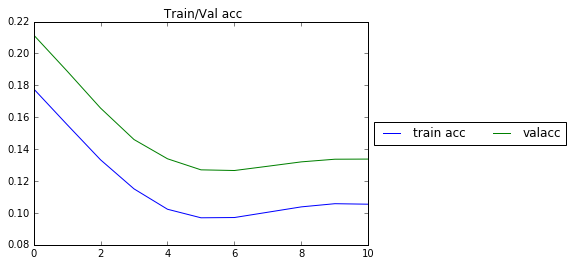

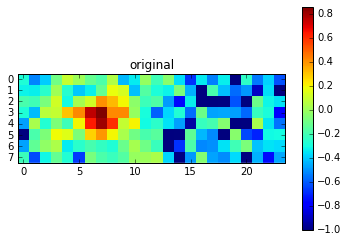

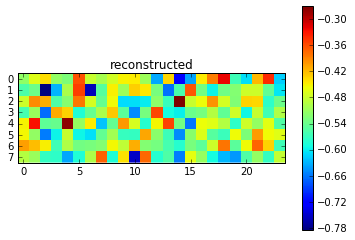

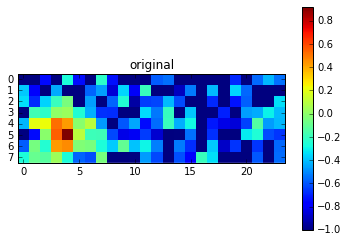

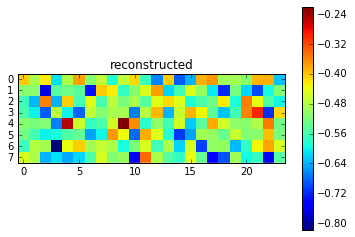

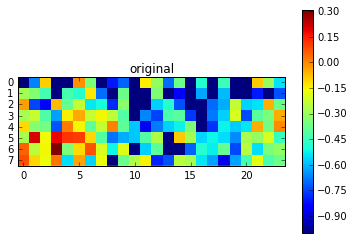

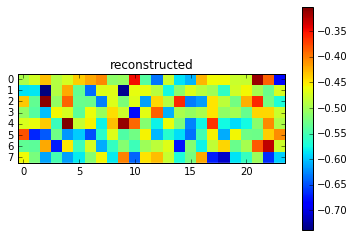

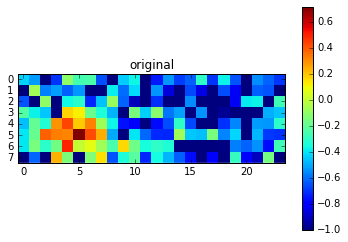

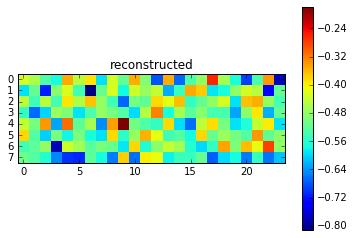

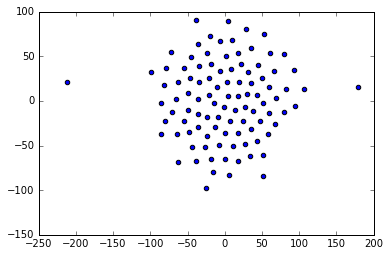

In [1]:
__author__ = 'racah'
import numpy as np
import os
import pickle
import sys
import h5py
import matplotlib
from sklearn.manifold import TSNE
import numpy as np
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from util.data_loaders import load_ibd_pairs, get_ibd_data
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from networks.evdcae_net import DenoisingConvAe
from networks.LasagneConv import IBDPairConvAe
from helper.helper_fxns import create_run_dir
import logging

# 1) Primary AD           10000 or 1
# 2) Delayed AD response  01000 or 2
# 3) Muon decay           00100 or 3
# 4) Flasher              00010 or 4
# 5) Other (background noise) 00001 or 5


# In[118]:

if __name__ == "__main__":
    run_dir = create_run_dir()
    x_train, x_val, x_test = get_ibd_data(tot_num_pairs=200, preprocess=True, just_charges=True)

    dca = DenoisingConvAe(network_kwargs={'learning_rate':0.01}, 
                          train_kwargs={'num_epochs': 11, 'save_path': run_dir})

    dca.fit(x_train,x_train,x_val,x_val)

    rec= dca.predict(x_train)

    hlayer = dca.extract_hidden_layer(x_train)



    ts = TSNE(perplexity=50).fit_transform(hlayer)

    plt.scatter(ts[:,0], ts[:,1])
    plt.savefig(run_dir + '/tsne.png')